In [29]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics
from sklearn.impute import SimpleImputer

In [2]:
# Read datasets
test_df = pd.read_csv("Resources/test.csv")
train_df = pd.read_csv("Resources/train.csv")
gender_submission = pd.read_csv("Resources/gender_submission.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
# Dataframe information
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
# Check null values
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data preprocessing

In [11]:
# Drop columns that is not helpful with the analysis
train_df.drop(["Cabin", "Name", "Ticket"], axis=1, inplace=True)

In [12]:
test_df.drop(["Cabin", "Name", "Ticket"], axis=1, inplace=True)

In [38]:
train_df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [13]:
train_df.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


In [14]:
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
test_df["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [16]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
# Transform column "Sex" and "Embarked"
onc = OneHotEncoder()
onc1_df = pd.DataFrame(onc.fit_transform(train_df[["Sex"]]).toarray())
onc2_df = pd.DataFrame(onc.fit_transform(train_df[["Embarked"]]).toarray())

In [18]:
# Transform columns on test dataframe
onc3_df = pd.DataFrame(onc.fit_transform(test_df[["Sex"]]).toarray())
onc4_df = pd.DataFrame(onc.fit_transform(test_df[["Embarked"]]).toarray())

In [19]:
onc1_df = onc1_df.rename(columns={0: "Female", 1: "Male"})
onc1_df.head()

,Female,Male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [20]:
onc3_df = onc3_df.rename(columns={0: "Female", 1: "Male"})
onc3_df.head()

,Female,Male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


In [21]:
onc2_df.drop(3, axis=1, inplace=True)
onc2_df = onc2_df.rename(columns={0: "C", 1: "Q", 2: "S"})
onc2_df.head(10)

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,1.0,0.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,0.0,0.0,1.0
9,1.0,0.0,0.0


In [22]:
#onc4_df.drop(3, axis=1, inplace=True)
onc4_df = onc4_df.rename(columns={0: "C", 1: "Q", 2: "S"})
onc4_df.head(10)

,C,Q,S
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
6,0.0,1.0,0.0
7,0.0,0.0,1.0
8,1.0,0.0,0.0
9,0.0,0.0,1.0


In [23]:
# Merge into train_df
new_train = pd.concat([train_df, onc1_df], axis=1)
new_train = pd.concat([new_train, onc2_df], axis=1)
new_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Female,Male,C,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,0.0,1.0,0.0,0.0,1.0
1,2,1,1,female,38.0,1,0,71.2833,C,1.0,0.0,1.0,0.0,0.0
2,3,1,3,female,26.0,0,0,7.9250,S,1.0,0.0,0.0,0.0,1.0
3,4,1,1,female,35.0,1,0,53.1000,S,1.0,0.0,0.0,0.0,1.0
4,5,0,3,male,35.0,0,0,8.0500,S,0.0,1.0,0.0,0.0,1.0


In [24]:
# Drop column Sex and Embarked
new_train.drop(["Sex","Embarked"], axis=1, inplace=True)

In [25]:
# Merge into test_df
new_test = pd.concat([test_df, onc3_df], axis=1)
new_test = pd.concat([new_test, onc4_df], axis=1)
new_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Female,Male,C,Q,S
0,892,3,male,34.5,0,0,7.8292,Q,0.0,1.0,0.0,1.0,0.0
1,893,3,female,47.0,1,0,7.0000,S,1.0,0.0,0.0,0.0,1.0
2,894,2,male,62.0,0,0,9.6875,Q,0.0,1.0,0.0,1.0,0.0
3,895,3,male,27.0,0,0,8.6625,S,0.0,1.0,0.0,0.0,1.0
4,896,3,female,22.0,1,1,12.2875,S,1.0,0.0,0.0,0.0,1.0


In [26]:
new_test.drop(["Sex","Embarked"], axis=1, inplace=True)

In [27]:
# split X and y on new_train
X_train = new_train.drop("Survived", axis=1)
y_train = new_train["Survived"]

In [40]:
# Age is an important factor, fill "nan" with the mean values
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imp.fit_transform(X_train)

In [52]:
test_set = new_test.merge(gender_submission, on="PassengerId", how="inner")
test_set.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Female,Male,C,Q,S,Survived
0,892,3,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0,0
1,893,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,1.0,1
2,894,2,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0,0
3,895,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0,0
4,896,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,1.0,1


In [53]:
test_th = test_set.drop("Survived", axis=1)
y_test = test_set["Survived"]

In [54]:
X_test = imp.fit_transform(test_th)

In [41]:
# Choose model and fit X
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
# Predict by using the trained model
y_predict = RFC.predict(X_test)
print(y_predict)

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 0 0 1 0 1 0 0 1 0 0 1]


In [55]:
# evaluate the results
metrics.accuracy_score(y_test, y_predict)

0.7870813397129187

In [56]:
# show confusion matrix
metrics.confusion_matrix(y_test, y_predict)

array([[230,  36],
       [ 53,  99]])

In [57]:
# classification report between y_test and y_prediction
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       266
           1       0.73      0.65      0.69       152

    accuracy                           0.79       418
   macro avg       0.77      0.76      0.76       418
weighted avg       0.78      0.79      0.78       418



In [58]:
# feature importance
importances = RFC.feature_importances_

[0.18999952 0.08638895 0.16942618 0.04161013 0.03164435 0.173447
 0.12076961 0.15219454 0.01395357 0.00857956 0.01198658]


In [69]:
feature_names = new_train.drop("Survived", axis=1).columns
feature_names

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Female',
       'Male', 'C', 'Q', 'S'],
      dtype='object')

In [70]:
importance_df = pd.DataFrame(list(zip(feature_names, importances)), columns=["Name", "Importance"])
importance_df

,Name,Importance
0,PassengerId,0.190000
1,Pclass,0.086389
2,Age,0.169426
3,SibSp,0.041610
4,Parch,0.031644
5,Fare,0.173447
6,Female,0.120770
7,Male,0.152195
8,C,0.013954
9,Q,0.008580


[Text(0, 0, 'PassengerId'),
 Text(1, 0, 'Pclass'),
 Text(2, 0, 'Age'),
 Text(3, 0, 'SibSp'),
 Text(4, 0, 'Parch'),
 Text(5, 0, 'Fare'),
 Text(6, 0, 'Female'),
 Text(7, 0, 'Male'),
 Text(8, 0, 'C'),
 Text(9, 0, 'Q'),
 Text(10, 0, 'S')]

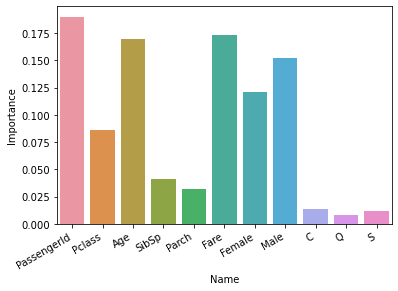

In [79]:
plt.figsize = (10,8)
ax = sns.barplot(data=importance_df, x="Name", y="Importance")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

In [80]:
# Training using KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)

In [81]:
metrics.accuracy_score(y_test, KNN_pred)

0.6507177033492823

In [83]:
metrics.confusion_matrix(y_test, KNN_pred)

array([[253,  13],
       [133,  19]])

In [84]:
print(metrics.classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78       266
           1       0.59      0.12      0.21       152

    accuracy                           0.65       418
   macro avg       0.62      0.54      0.49       418
weighted avg       0.63      0.65      0.57       418



KNN is not as accurate as Random Forest

# Hyperparametre tuning to improve performance


In [ ]:
#import Gridsearch for dependencies
from sklearn.model_selection import GridSearchCV

In [ ]:
# Use n_neighbors, weight and leaf_size as parameters
n_neighbors = [3,5,7,9,11]
leaf_size = list(range(1,50))
weights = ["uniform", "distance"]
# put parameters into a dic
grid_param = {}